In [241]:
# IMPORTING LIBRARIES 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set()
%matplotlib inline


import statsmodels.api as sm
from scipy import stats
import scipy.stats as stats


#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [245]:
# IMPORTING AND INSPECTING CRIME DATASET

#Importing 
df = pd.read_csv('BerlinCrime.csv')
df.head()
df.dtypes

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


Year               int64
District          object
Code               int64
Location          object
Robbery            int64
Street_robbery     int64
Injury             int64
Agg_assault        int64
Threat             int64
Theft              int64
Car                int64
From_car           int64
Bike               int64
Burglary           int64
Fire               int64
Arson              int64
Damage             int64
Graffiti           int64
Drugs              int64
Local              int64
dtype: object

## 1. What crime types  exist and what types are the most common?

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d4bbc4eb80>)

Text(0.5, 0, 'Type of Crime')

Text(0, 0.5, 'Count of Crime')

Text(0.5, 1.0, 'Crime Types')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

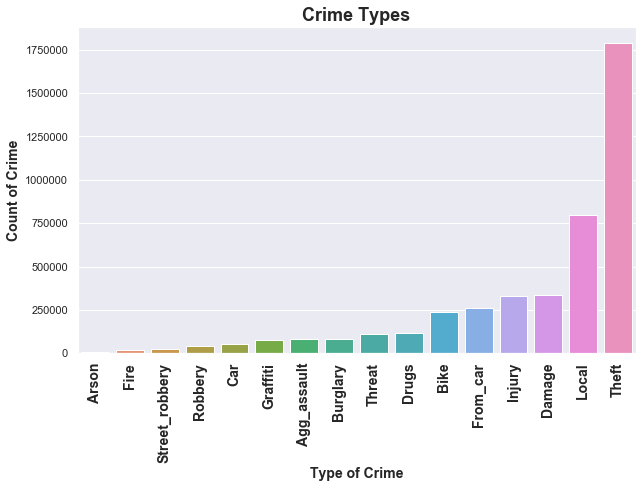

In [328]:
# visualisation of the overall count of different crime types

totalcrimes =df.drop(columns=['Year','District','Location','Code'])
allcrimes = totalcrimes.sum()
allcrimes1 = pd.DataFrame(allcrimes).reset_index()
allcrimes1.columns = ['type','counts']
allcrimes1 = allcrimes1.sort_values('counts')

plt.subplots(figsize = (10,6))
ax = sns.barplot(allcrimes1.type, allcrimes1.counts)

ax.set_xlabel('Type of Crime',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Count of Crime',fontsize=14,FontWeight = 'bold');
ax.set_title('Crime Types',fontsize=18,FontWeight = 'bold' )

plt.xticks(rotation=90, fontsize = 14, FontWeight='bold')


Theft by far the most common (and does not include car theft and bike theft). The second most common type of crime is 'local', meaning that the perpetrator commited a crime in their district. These categories, however, are not clearly defined, and it is unclear how crimes are sometimes categorized(e.g. how is a case in which the perpetrator robs a shop in his/her district with a weapon, harming the shopkeepers, and running away from the crime scene by a car). 

Given that Local and Theft make a larger portion of the total number of crimes than all other types do, they should be treated separately. 

## 2. Which districts have the most crimes?

In [244]:
#Counts of each crime in each district
district_overview  = df.groupby('District', as_index=False).sum()
district_overview.drop(['Year', 'Code'], axis=1, inplace=True)
district_overview= district_overview.reset_index(drop=True)

#summing number of crimes per district and assigning it to a new column
district_overview['AllCrimes']= district_overview.sum(axis=1)
district_overview = district_overview.sort_values('AllCrimes')
district_overview


,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes
3,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019
11,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173
8,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582
9,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033
2,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785
7,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585
10,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459
6,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058
5,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786
0,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618


<BarContainer object of 12 artists>

[Text(0, 0, 'Marzahn-Hellersdorf'),
 Text(0, 0, 'Treptow-Köpenick'),
 Text(0, 0, 'Spandau'),
 Text(0, 0, 'Steglitz-Zehlendorf'),
 Text(0, 0, 'Lichtenberg'),
 Text(0, 0, 'Reinickendorf'),
 Text(0, 0, 'Tempelhof-Schöneberg'),
 Text(0, 0, 'Pankow'),
 Text(0, 0, 'Neukölln'),
 Text(0, 0, 'Charlottenburg-Wilmersdorf'),
 Text(0, 0, 'Friedrichshain-Kreuzberg'),
 Text(0, 0, 'Mitte')]

Text(0.5, 0, 'District')

Text(0, 0.5, 'Count of Crime')

Text(0.5, 1.0, 'Overview of Crime in Each District')

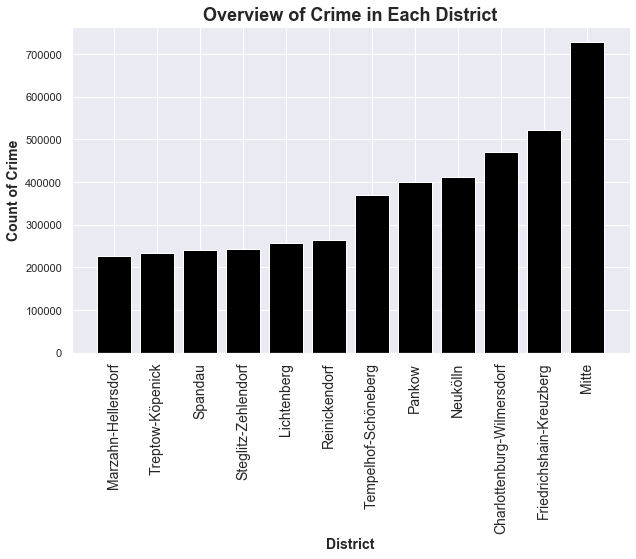

In [329]:
#visualising crime count per district

#1 bar plot
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(district_overview['District'],
        district_overview['AllCrimes'],
        color='black')
ax.set_xticklabels(district_overview['District'],fontsize=14, rotation=90)
ax.set_xlabel('District',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Count of Crime',fontsize=14,FontWeight = 'bold');
ax.set_title('Overview of Crime in Each District',fontsize=18,FontWeight = 'bold' )

plt.show()    

[Text(0, 0, 'Marzahn-Hellersdorf'),
 Text(0, 0, 'Treptow-Köpenick'),
 Text(0, 0, 'Spandau'),
 Text(0, 0, 'Steglitz-Zehlendorf'),
 Text(0, 0, 'Lichtenberg'),
 Text(0, 0, 'Reinickendorf'),
 Text(0, 0, 'Tempelhof-Schöneberg'),
 Text(0, 0, 'Pankow'),
 Text(0, 0, 'Neukölln'),
 Text(0, 0, 'Charlottenburg-Wilmersdorf'),
 Text(0, 0, 'Friedrichshain-Kreuzberg'),
 Text(0, 0, 'Mitte')]

Text(0.5, 0, 'District')

Text(0, 0.5, 'Count of Crime')

Text(0.5, 1.0, 'Overview of Crime in Each District')

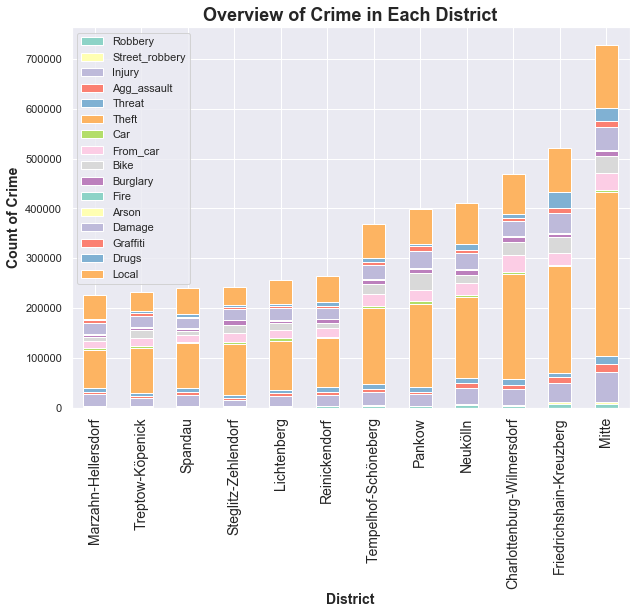

In [6]:
#2 stacked bar plot
qualitative_colors = sns.color_palette("Set3", 10)
district_stack = district_overview.drop(columns = ['AllCrimes'], axis= 1)
ax=district_stack.set_index('District').plot(kind='bar', stacked=True, figsize=(10,7), color=qualitative_colors)
ax.set_xticklabels(district_stack['District'],fontsize=14, rotation=90)
ax.set_xlabel('District',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Count of Crime',fontsize=14,FontWeight = 'bold');
ax.set_title('Overview of Crime in Each District',fontsize=18,FontWeight = 'bold' )

The highest occcurrence of crime is noted in Mitte, Friedrichshain-Kreuzberg and Charlottenburg-Wilmersdorf, all central areas. The relative proportions of different crimes in each district look very similar 

## 3. Is There a Correlation Between Count of Crimes and Areas of Each District?

In [249]:
#Adding area information (obtained from Wiki)
Areas = [{'Charlottenburg-Wilmersdorf': '64.72','Friedrichshain-Kreuzberg':'20.16', 'Lichtenberg':'52.29',
          'Marzahn-Hellersdorf': '61.74','Mitte':'39.47','Neukölln':'44.93',
          'Pankow':'103.01','Reinickendorf':'89.46','Spandau':'91.91','Steglitz-Zehlendorf':'102.50',
          'Tempelhof-Schöneberg': '53.09', 'Treptow-Köpenick':'168.42'}]
Areasdf = pd.DataFrame(Areas)
Areasdf= Areasdf.T.reset_index()
Areasdf.columns = ['District','Area']
Areasdf
DO = pd.merge(district_overview, Areasdf, on='District')

,District,Area
0,Charlottenburg-Wilmersdorf,64.72
1,Friedrichshain-Kreuzberg,20.16
2,Lichtenberg,52.29
3,Marzahn-Hellersdorf,61.74
4,Mitte,39.47
5,Neukölln,44.93
6,Pankow,103.01
7,Reinickendorf,89.46
8,Spandau,91.91
9,Steglitz-Zehlendorf,102.50


In [250]:
#Regression model

DO['Area'] = DO['Area'].astype(float)

DO = sm.add_constant(DO)
DO.head()
lin_reg4 = sm.OLS(DO["AllCrimes"],
                 DO[["const", "Area"]]).fit()

lin_reg4.summary()


,const,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes,Area
0,1.0,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019,61.74
1,1.0,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173,168.42
2,1.0,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582,91.91
3,1.0,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033,102.50
4,1.0,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785,52.29


C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AllCrimes   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     4.812
Date:                Sat, 11 Jul 2020   Prob (F-statistic):             0.0530
Time:                        17:58:42   Log-Likelihood:                -157.45
No. Observations:                  12   AIC:                             318.9
Df Residuals:                      10   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.28e+05   8.42e+04      6.274      0.000     3.4e+05    7.15e+05
Area       -2213.4756   1009.016     -2.194      0.053   -4461.703      34.752
==============================================================================
Omnibus:                        3.132   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                1.237
Skew:                           0.775   Prob(JB):                        0.539
Kurtosis:                       3.274   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Establishing correlation between total number of offenses and the size of each district in square km.
DO.Area = DO.Area.astype(float)
round(DO['AllCrimes'].corr(DO['Area']),2)

-0.57

It is a moderate negative correlation (r= -0.57), which means that the area of the district does to some extend affect the number of crimes. That is, larger areas tend to have less crime, could  be interpreted as a consequence of their geographical layout and population density. Whilst central areas like Mitte and Friedrichschein-Kreuzberg are very densely populated, areas like Treptow-Köpenick or Spandau have lot of green spaces, lakes, etc. Although this correlation has been noted, as indicated above in the regression model, the adjusted R-squared is only 0.26,possibly partly due to the small sample size. 


Text(0.5, 0, 'Total number of crimes')

Text(0, 0.5, 'District Area(square km)')

Text(0.5, 1.0, 'Scatter plot of crimes and area of each district')

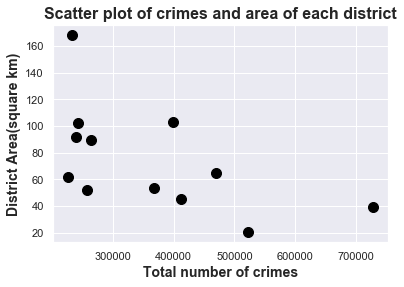

In [251]:
# Visualising the relationship of crimes and district sizes
x = DO['AllCrimes']
y = DO['Area']
plt.scatter(x,y, color = 'black',s=100)
plt.xlabel('Total number of crimes',fontsize=14,FontWeight = 'bold')
plt.ylabel('District Area(square km)',fontsize=14,FontWeight = 'bold')

plt.title("Scatter plot of crimes and area of each district",fontsize=16,FontWeight = 'bold')

## 4. Is There a Correlation Between Count of Crimes and Population Size in Each District?

In [252]:
#Importing and Inspecting Population Dataset and its Correlation to the Crime Data

#1 importing and inspecting data
population = pd.read_excel('BerlinPopulationFinal.xlsx')
population.columns = ['Citizenship','Year','Sex','Age','District','Population']

#checking datatypes
population.dtypes

#dropping unnecessary columns at this point in order to group data based on year and district
population_overview = population.drop(columns = ['Age','Sex','Citizenship'])
population_overview = population_overview.groupby(['Year', 'District'], as_index=False).agg({"Population": "sum"})
population_overview.Population  = population_overview.Population.astype(int)
population_overview.head()

# grouping the crime dataset based on year and district
dfgroup = df.groupby(['Year', 'District'], as_index=False).sum()

#dropping district code so that crimes can be summarized in a new column
dfgroup = dfgroup.drop(columns = ['Code'])

# putting year as an index so that the crimes can be summed. 
dfgroup = dfgroup.reset_index().set_index('Year')

#dropping index column
dfgroup = dfgroup.drop(columns = ['index'])

# assigning a total column 
dfgroup['AllCrimes']= dfgroup.sum(axis=1)

#putting back year as a column
dfgroup.reset_index(level=0, inplace=True)
dfgroup.head()

# merging crime list with population overview, in order to establish if the size of the population can be correlated to the number of crimes.
popcrimes = pd.merge(dfgroup, population_overview, on=['District', 'Year'],how='inner')
popcrimes.head()

# checking correlation of number of crimes with the size of population in each year and each district
round(popcrimes['AllCrimes'].corr(popcrimes['Population']),2)

Citizenship     object
Year             int64
Sex             object
Age             object
District        object
Population     float64
dtype: object

,Year,District,Population
0,2012,Berlin,3469621
1,2012,Charlottenburg-Wilmersdorf,319289
2,2012,Friedrichshain-Kreuzberg,269471
3,2012,Lichtenberg,260505
4,2012,Marzahn-Hellersdorf,251879


,Year,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes
0,2012,Charlottenburg-Wilmersdorf,643,248,4224,1195,1427,24061,707,3770,3173,1544,133,45,3975,847,1064,9997,57053
1,2012,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,3285,1214,314,105,5499,1311,1853,11001,57969
2,2012,Lichtenberg,260,112,2570,586,789,11911,445,1979,1418,632,187,67,3355,896,335,6252,31794
3,2012,Marzahn-Hellersdorf,331,148,3052,625,929,9714,451,1778,1075,457,242,77,3435,800,308,6202,29624
4,2012,Mitte,1253,610,7921,2362,2242,36486,620,4317,3358,1695,354,140,6180,1346,2849,16545,88278


,Year,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes,Population
0,2012,Charlottenburg-Wilmersdorf,643,248,4224,1195,1427,24061,707,3770,3173,1544,133,45,3975,847,1064,9997,57053,319289
1,2012,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,3285,1214,314,105,5499,1311,1853,11001,57969,269471
2,2012,Lichtenberg,260,112,2570,586,789,11911,445,1979,1418,632,187,67,3355,896,335,6252,31794,260505
3,2012,Marzahn-Hellersdorf,331,148,3052,625,929,9714,451,1778,1075,457,242,77,3435,800,308,6202,29624,251879
4,2012,Mitte,1253,610,7921,2362,2242,36486,620,4317,3358,1695,354,140,6180,1346,2849,16545,88278,339974


0.63

There is  a moderate positive (r= 0.63) correlation between the two, but it is a stronger correlation than the number of crimes and the area of districts.

Certain districts display no straightforward relationship. This is likely to be either the consequence of only certain crime types being related to the population size, or the reason of particular parts of districts having higher crime rates than others. 

In [253]:
# Merging this dataframe with the Area information
popcrimes_area = pd.merge(popcrimes, Areasdf, on =['District'], how='inner' )
popcrimes_area

,Year,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,...,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes,Population,Area
0,2012,Charlottenburg-Wilmersdorf,643,248,4224,1195,1427,24061,707,3770,...,1544,133,45,3975,847,1064,9997,57053,319289,64.72
1,2013,Charlottenburg-Wilmersdorf,639,258,3998,1049,1507,25733,720,4686,...,1663,149,64,3759,889,1180,10062,59329,322870,64.72
2,2014,Charlottenburg-Wilmersdorf,641,338,3840,907,1493,26829,767,4674,...,1746,134,58,3422,769,1208,10047,59990,326354,64.72
3,2015,Charlottenburg-Wilmersdorf,536,288,3805,880,1355,30622,741,4499,...,1567,145,64,3401,548,885,10407,63567,330468,64.72
4,2016,Charlottenburg-Wilmersdorf,523,292,3919,865,1418,28893,755,4345,...,1095,175,83,3497,668,948,9441,60363,336249,64.72
5,2017,Charlottenburg-Wilmersdorf,401,198,3967,921,1319,25950,875,3973,...,962,157,65,3806,978,942,9595,57461,338831,64.72
6,2018,Charlottenburg-Wilmersdorf,417,205,4047,1011,1377,25374,681,3177,...,933,195,92,3558,813,1024,10888,57266,341327,64.72
7,2019,Charlottenburg-Wilmersdorf,420,212,4131,969,1484,22571,575,3352,...,1096,225,122,3911,852,1174,10407,54589,343592,64.72
8,2012,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,...,1214,314,105,5499,1311,1853,11001,57969,269471,20.16
9,2013,Friedrichshain-Kreuzberg,906,622,4792,1437,1168,24474,602,2636,...,1090,265,90,5094,1168,2391,11289,61539,273517,20.16


In [274]:
#lin reg per year and district
popcrimes = sm.add_constant(popcrimes)

lin_reg2 = sm.OLS(popcrimes["AllCrimes"],
                 popcrimes[["const", "Population"]])

result2 = lin_reg2.fit()
result2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AllCrimes   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     61.69
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           6.44e-12
Time:                        18:21:53   Log-Likelihood:                -1055.7
No. Observations:                  96   AIC:                             2115.
Df Residuals:                      94   BIC:                             2121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.875e+04   9561.358     -3.006      0.003   -4.77e+04   -9761.658
Population     0.2451      0.031      7.855      0.000       0.183       0.307
==============================================================================
Omnibus:                       14.639   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.397
Skew:                           0.988   Prob(JB):                     0.000275
Kurtosis:                       3.437   Cond. No.                     1.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The slope is: 1.6169158168421816
The intercept is: 229236.30372093694
The correlation is0.6294862562616526
The t-test shows this correlation is statistically significant.


<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Count of Crime')

Text(0, 0.5, 'Size of Population')

Text(0.5, 1.0, 'Correlation between population size and crime')

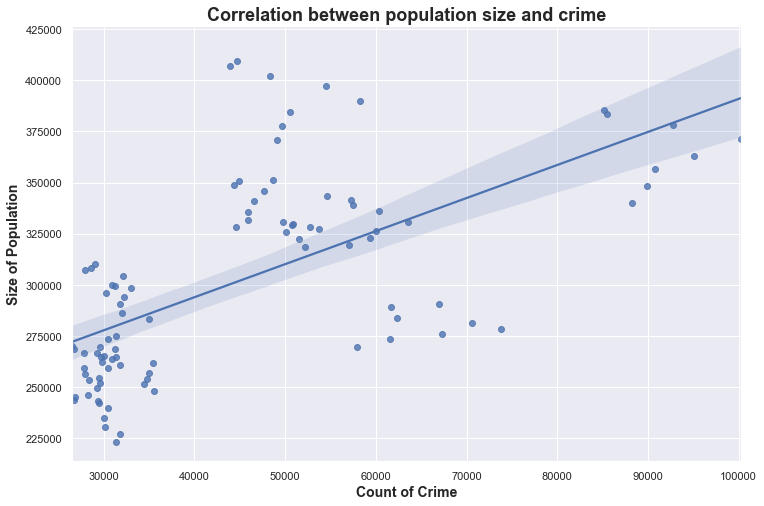

In [275]:
# Visualising the result
X= popcrimes['AllCrimes']
Y= popcrimes['Population']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print('The correlation is' + str(r_value))
if p_value <0.05:
    print('The t-test shows this correlation is statistically significant.')

plt.figure(figsize=(12,8))

sns.regplot(x= 'AllCrimes',
            y= 'Population',
            data =popcrimes,
            );
plt.xlabel('Count of Crime', fontsize=14, FontWeight='bold')
plt.ylabel('Size of Population', fontsize=14, FontWeight='bold')
plt.title('Correlation between population size and crime', fontsize=18, FontWeight='bold')


<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Crimes')

Text(0, 0.5, 'Population Size')

Text(0.5, 1.0, 'Correlation of Crime and Population Size')

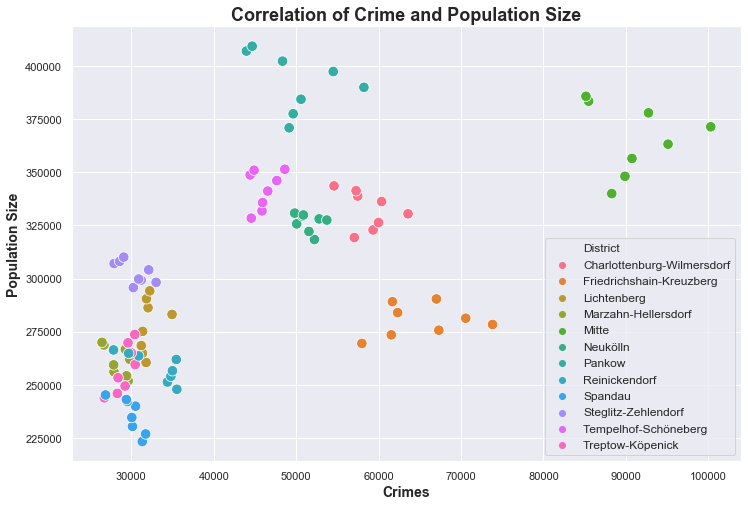

In [330]:
# Visualisation of the relationship between number of crimes and population size/per year and their distinction by district.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = popcrimes['AllCrimes'], y = popcrimes['Population'],hue=popcrimes['District'], s=110)
plt.legend(fontsize=12, title_fontsize=11)
#a.set_xlabel('new x label', fontweight='bold')
ax.set_xlabel('Crimes',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Population Size',fontsize=14,FontWeight = 'bold');
ax.set_title('Correlation of Crime and Population Size',fontsize=18,FontWeight = 'bold' )
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [257]:
#Checking correlations between crime types, their counts and population. 

popcors = pd.DataFrame(popcrimes.corr()['Population'])
popcors.sort_values('Population')

,Population
Year,0.179076
Drugs,0.259812
Street_robbery,0.319215
Robbery,0.352857
Fire,0.358736
Arson,0.380057
Agg_assault,0.389814
Injury,0.443636
Car,0.476676
Threat,0.527240


As shown above, correlations with population vary by crime category.They are mostly moderately correlated, and the only strong correlation that exists in the dataset is the number of bike thefts with the population size. Although only a moderate correlation has been established between most of crimes and population size, given that this correlation is stronger than the correlation between the area of district and crime counts, we will standarize the data by the 'frequency' of crimes. That is, number of crimes per 100 000 people. It should be noted that the adjusted R-squared value is only 0.39.

As shown above, the model is slightly better with taking into consideration both area and population size of each district. 

## 5. Crime Frequency Rates - Inspecting the Data

In [276]:
#importing the frequency dataset (Crime counts standardized by the population size)
crime_freq = pd.read_excel('BerlinCrime_frequency.xlsx')
crime_freq.head()

# importing the  frequency table that was rearranged in excel
cfreq = pd.read_excel('Berlincrime_frequency_rearranged.xlsx')
pd.set_option('display.max_rows', 100)
cfreq = pd.DataFrame(cfreq)
cfreq.columns

#renaming the crime_hood\t back to local
cfreq = cfreq.replace('crime_hood\t','local')
# checking types
cfreq.dtypes
cfreq.head()

#Getting rid of obvious outliers (very high frequencies, based on a very low population in some districts (e.g.Grunewald Forest))
cfreqout = cfreq.sort_values(['frequency'], ascending=False)
len(cfreqout)
cfreqout.head(10)

outliers = []
data = cfreqout['frequency']
def find_outliers(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
    return outliers

outliers = pd.DataFrame(find_outliers(data))
outliers.columns = ['outliers']
len(outliers)


,year,hood_id,neighborhood,district,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,crime_hood\t
0,2012,10111,Tiergarten Süd,Mitte,556,365,4651,1540,937,17960,143,2603,952,540,127,32,2167,206,1357,8190
1,2012,10112,Regierungsviertel,Mitte,709,316,5171,1342,1549,34941,109,3349,1854,404,109,44,4145,1353,1069,9491
2,2012,10113,Alexanderplatz,Mitte,513,288,3265,962,644,19045,172,1678,1742,583,104,57,3259,1106,922,6586
3,2012,10114,Brunnenstraße Süd,Mitte,203,98,993,235,258,7494,336,751,1549,512,55,20,1674,477,833,2941
4,2012,10221,Moabit West,Mitte,310,122,1502,442,475,5897,224,979,776,384,100,53,1232,153,618,3349


Index(['year', 'hood_id', 'neighborhood', 'district', 'type', 'frequency'], dtype='object')

year             int64
hood_id          int64
neighborhood    object
district        object
type            object
frequency        int64
dtype: object

,year,hood_id,neighborhood,district,type,frequency
0,2012,90312,Schmöckwitz/Karolinenhof/Rauchfangswerder,TreptowKöpenick,robbery,0
1,2013,90414,AllendeViertel,TreptowKöpenick,robbery,0
2,2013,90416,Müggelheim,TreptowKöpenick,robbery,0
3,2014,40617,Forst Grunewald,CharlottenburgWilmersdorf,robbery,0
4,2014,90416,Müggelheim,TreptowKöpenick,robbery,0


17664

,year,hood_id,neighborhood,district,type,frequency
16559,2012,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,125333
16558,2013,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,95775
16557,2016,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,86957
16556,2012,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft_from_car,74667
17576,2019,40617,Forst Grunewald,CharlottenburgWilmersdorf,local,65672
16555,2014,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,58904
16554,2016,10112,Regierungsviertel,Mitte,theft,54452
16553,2019,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,53731
16552,2015,10112,Regierungsviertel,Mitte,theft,53276
17552,2018,40617,Forst Grunewald,CharlottenburgWilmersdorf,local,50000


-7419.650015507527


175

In [260]:
# merging this with the cfreqout, and getting rid of the outliers
cfreqout_wo_outliers = pd.merge(cfreqout, outliers, left_on='frequency', right_on='outliers', how = 'outer')
#cfreqout_wo_outliers = cfreqout_wo_outliers.loc[cfreqout_wo_outliers['outliers'] == 'Keep']

cfreqout_wo_outliers['outliers'] = cfreqout_wo_outliers['outliers'].fillna('Keep')
cfreqout_wo_outliers = cfreqout_wo_outliers.loc[cfreqout_wo_outliers['outliers'] == 'Keep']
cfreqout_wo_outliers1 = cfreqout_wo_outliers.drop(columns = ['outliers'])
cfreqout_wo_outliers1.head()


,year,hood_id,neighborhood,district,type,frequency
191,2012,90101,AltTreptow,TreptowKöpenick,theft,9409
192,2017,90206,Niederschöneweide,TreptowKöpenick,theft,9402
193,2016,30611,Prenzlauer Berg Nordwest,Pankow,theft,9392
194,2013,20304,südliche Luisenstadt,FriedrichshainKreuzberg,theft,9358
195,2015,40310,Halensee,CharlottenburgWilmersdorf,theft,9344


In [277]:
# inspecting the average frequency of each crime type
crimes = cfreqout_wo_outliers1.groupby('type')['frequency'].mean().reset_index().sort_values('frequency')
crimes

,type,frequency
2,arson,47.097744
12,street_robbery,87.595845
0,accidental_fire,88.255455
11,robbery,142.908004
5,car_theft,181.903636
10,property_damage_graffiti,266.353636
4,burglary,291.870556
1,agg_assault,303.596189
6,drugs,370.280766
15,threat,405.472348


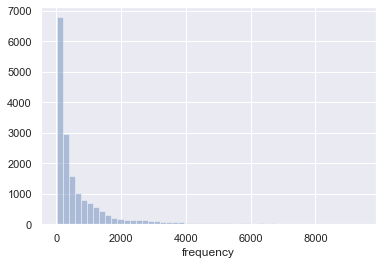

In [278]:
# Checking the distribution of the dataset

sns.distplot(cfreqout_wo_outliers1['frequency'], kde=False)


## 6. Which Neighbourhood has the Highest Crime Rate?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

[(0, 5000)]

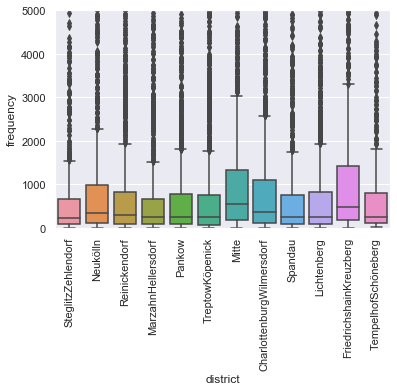

In [279]:
a = sns.boxplot(x=cfreqout_wo_outliers1['district'],y=cfreqout_wo_outliers1['frequency'])
plt.xticks(rotation=90)
a.set(ylim =(0,5000))
plt.show()

,year,hood_id,frequency
count,17664.000000,17664.000000,17664.000000
mean,2015.500000,66337.811594,996.297101
std,2.291353,34740.039889,2805.395117
min,2012.000000,10111.000000,0.000000
25%,2013.750000,40101.000000,99.000000
50%,2015.500000,70151.500000,296.000000
75%,2017.250000,90519.000000,929.000000
max,2019.000000,123043.000000,125333.000000


2

,year,hood_id,frequency,log10_frequency
count,17361.000000,17361.000000,17361.000000,17361.000000
mean,2015.503542,66550.806520,818.040839,2.465250
std,2.293047,34736.750858,1349.510906,0.662177
min,2012.000000,10111.000000,2.000000,0.300000
25%,2014.000000,40101.000000,101.000000,2.000000
50%,2016.000000,70202.000000,294.000000,2.470000
75%,2018.000000,90519.000000,902.000000,2.960000
max,2019.000000,123043.000000,9409.000000,3.970000


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d4aab6bb80>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'District')

Text(0, 0.5, 'Log10 Frequency of Crime')

Text(0.5, 1.0, 'Frequency of Crime')

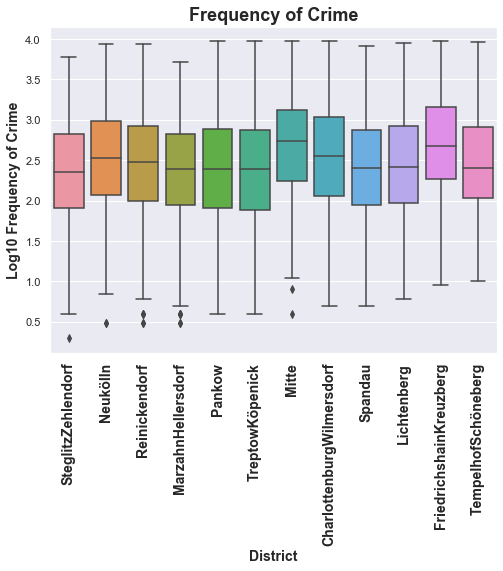

,year,hood_id,neighborhood,district,type,frequency,log10_frequency
17551,2017,60306,Drakestr.,SteglitzZehlendorf,street_robbery,2,0.30
17545,2017,80207,Buckow,Neukölln,street_robbery,3,0.48
17546,2019,122311,Nord 1 Frohnau/Hermsdorf,Reinickendorf,arson,3,0.48
17550,2018,100409,Mahlsdorf,MarzahnHellersdorf,accidental_fire,3,0.48
17548,2013,122311,Nord 1 Frohnau/Hermsdorf,Reinickendorf,arson,3,0.48


In [271]:
#Using Log10 to represent the crime frequencies in each district

cfreq.describe()
    
#dropping rows where frequency is 0. 
cfreqout_wo_outliers1= cfreqout_wo_outliers1[cfreqout_wo_outliers1['frequency'] != 0]
cfreqout_wo_outliers1['frequency'].min()

#creating a column with log10 transformation. 
cfreqout_wo_outliers1['log10_frequency'] = round(np.log10(cfreqout_wo_outliers1['frequency']),2)

cfreqout_wo_outliers1.describe()

# Plotting the result

cfreqout_wo_outliers1 =cfreqout_wo_outliers1.sort_values('log10_frequency')
plt.subplots(figsize = (8,6))
ax = sns.boxplot(x=cfreqout_wo_outliers1['district'],y=cfreqout_wo_outliers1['log10_frequency'])
plt.xticks(rotation=90, fontsize = 14,FontWeight='bold')
ax.set_xlabel('District',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Log10 Frequency of Crime',fontsize=14,FontWeight = 'bold');
ax.set_title('Frequency of Crime',fontsize=18,FontWeight = 'bold' )
plt.show()

cfreqout_wo_outliers1.head()

It is clear that there is alot of outliers, and that the data is not normally distributed. For that reason, we normalized the frequency by using the log10 transformation.

As noted above, it is evident that Mitte, Friedrichshain/Kreuzberg and Charlottenburg/Wilmersdorf have the highest frequency of crimes.

,district,frequency
9,SteglitzZehlendorf,574.42
3,MarzahnHellersdorf,645.90
11,TreptowKöpenick,673.85
6,Pankow,742.41
10,TempelhofSchöneberg,745.40
2,Lichtenberg,747.88
7,Reinickendorf,768.29
8,Spandau,770.54
5,Neukölln,897.72
0,CharlottenburgWilmersdorf,994.17


<BarContainer object of 12 artists>

[Text(0, 0, 'SteglitzZehlendorf'),
 Text(0, 0, 'MarzahnHellersdorf'),
 Text(0, 0, 'TreptowKöpenick'),
 Text(0, 0, 'Pankow'),
 Text(0, 0, 'TempelhofSchöneberg'),
 Text(0, 0, 'Lichtenberg'),
 Text(0, 0, 'Reinickendorf'),
 Text(0, 0, 'Spandau'),
 Text(0, 0, 'Neukölln'),
 Text(0, 0, 'CharlottenburgWilmersdorf'),
 Text(0, 0, 'FriedrichshainKreuzberg'),
 Text(0, 0, 'Mitte')]

Text(0.5, 0, 'District')

Text(0, 0.5, 'Crime Frequency')

Text(0.5, 1.0, 'Overview of Crime Frequency in Each District')

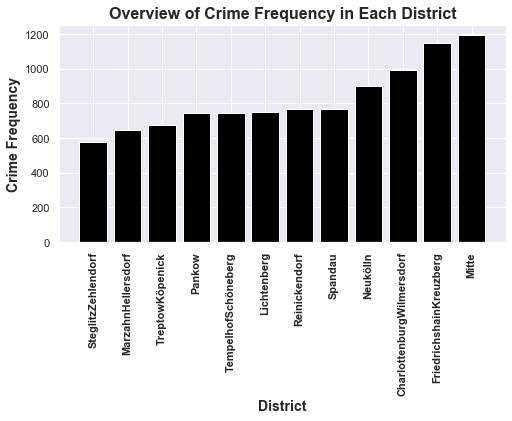

In [24]:
#grouing per district to calculate the mean of mean of frequencies...

districts = cfreqout_wo_outliers1.groupby('district')['frequency'].mean().reset_index().sort_values('frequency')
pd.set_option('display.max_rows', None)
districts['frequency'] = round(districts['frequency'],2)
districts
districts = districts.sort_values('frequency')

#visualising average frequency of crime per district
fig, ax = plt.subplots(figsize = (8,4))
ax.bar(districts['district'],districts['frequency'], color='black')
ax.set_xticklabels(districts['district'],FontWeight = 'bold', rotation=90)
ax.set_xlabel('District',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Crime Frequency',fontsize=14,FontWeight = 'bold');
ax.set_title('Overview of Crime Frequency in Each District',fontsize=16,FontWeight = 'bold' )

Comparing this chart with the chart we created based on the real counts of crimes, we see that the result is about the same, with Charlottenburg-Wilmersdorf and Friedrichshain-Kreuzberg being actually closer to Mitte when standardized. One of the reason these three districts stand out is that they are also the most crowded and central areas, so apart from people living there, there is a greater influx of people from other districts, and even cities on a daily basis, including tourists, so general crimes such as theft are more likely to happen in these areas.

## 7. What are the Top Crimes  in Each District?

,district,type,frequency
29,FriedrichshainKreuzberg,theft,7364.42
77,Mitte,theft,6956.07
13,CharlottenburgWilmersdorf,theft,5825.54
93,Neukölln,theft,5313.89
109,Pankow,theft,4911.85


192

,district,type,frequency
2,CharlottenburgWilmersdorf,theft,5825.54
26,CharlottenburgWilmersdorf,injury,1305.78
15,CharlottenburgWilmersdorf,local,2767.07
0,FriedrichshainKreuzberg,theft,7364.42
24,FriedrichshainKreuzberg,property_damage,1766.02
11,FriedrichshainKreuzberg,local,3951.34
21,Lichtenberg,local,2155.21
33,Lichtenberg,property_damage,1024.34
6,Lichtenberg,theft,4713.50
30,MarzahnHellersdorf,injury,1095.38


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'District')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Top 3 Crimes in Each District')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

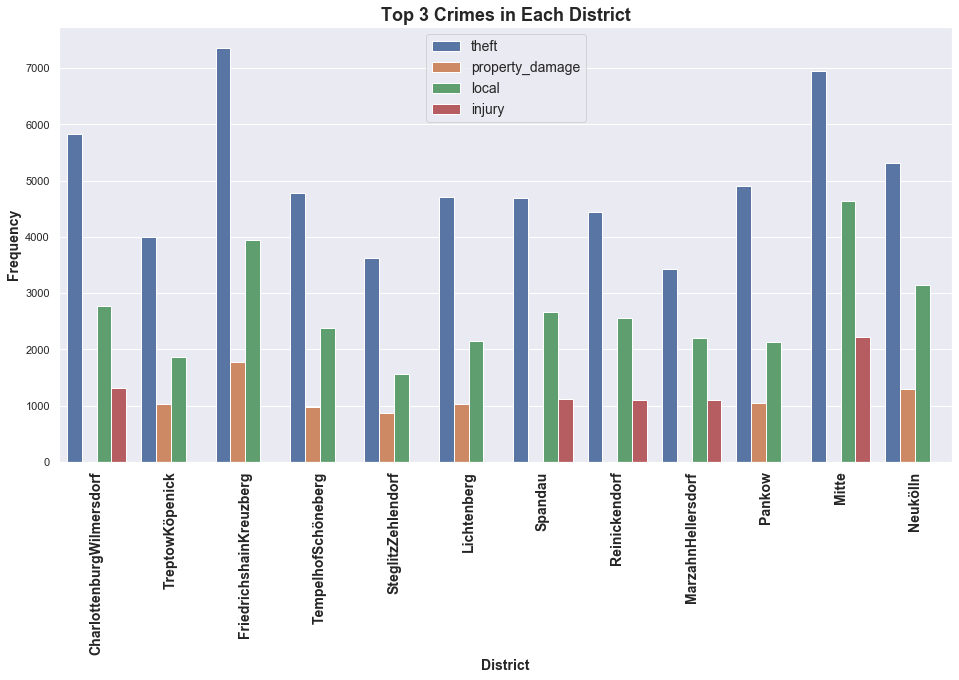

In [308]:
dang_dist = (cfreqout_wo_outliers1.groupby(by=["district",'type']).
              agg({"frequency":"mean"}).reset_index().
              sort_values(by=["frequency","district",'type'], ascending=False))
dang_dist['frequency'] = round(dang_dist['frequency'],2)

dang_dist.head()
len(dang_dist)

topcrimes_district = dang_dist.groupby('district').head(3).reset_index(drop=True)
topcrimes_district = topcrimes_district.sort_values('district')
topcrimes_district.head(10)

#Visualising top 3 crimes
topcrimes_district=topcrimes_district.sort_values('type', ascending=False)
plt.figure(figsize=(16,8))
ax= sns.barplot(x= 'district',
            y= 'frequency',
            data =topcrimes_district,
            
            hue='type'
            )
plt.legend(fontsize=14, title_fontsize=11)
ax.set_xlabel('District',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Frequency',fontsize=14,FontWeight = 'bold');
ax.set_title('Top 3 Crimes in Each District',fontsize=18,FontWeight = 'bold' )

plt.xticks(rotation=90, fontsize = 14, FontWeight='bold')

As expected, average frequency of theft and local crime is higher than others in each districts. The third top crime varies from district to district, and it is always either injury or property damage.

In [309]:
# Distribution of Theft and Local Crime

#spliting crimes in two groups: theft & crime_hood and others. 
#creating group1 with other crimes
group1 = cfreqout_wo_outliers1[cfreqout_wo_outliers1['type']!= 'theft']
group1 = group1[group1['type']!= 'local']

#creating group2 with the most common ones
lst1 = ['theft','local']
group2= cfreqout_wo_outliers1[cfreqout_wo_outliers1.type.isin(lst1)]

#checking if it is correct                                           
len(group2) + len(group1) == len(cfreqout_wo_outliers1)

True

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

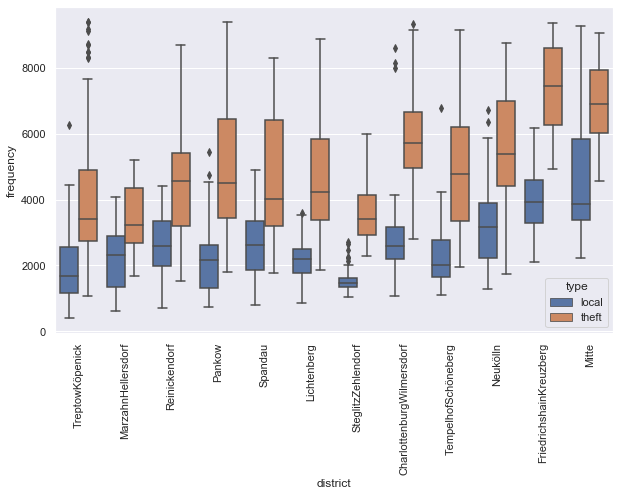

In [307]:
#plotting the distribution per district
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(group2.district, group2.frequency, hue=group2.type)
plt.xticks(rotation=90)

It appears that the perpetrators living in  Neukolln, Friedrichshain/Kreuzberg and Mitte are more likely to commit the crime in their own districts than other fellons are.
Charlottenburg/Wilmersdorf and Mitte, followed by Friedrichshain/Kreuzberg have by far more thefts than others districts.

## 8. What are the top 10 Most 'Dangerous' Neighbourhoods (by the crime frequency)?

In [26]:
dang_neigh = (cfreqout_wo_outliers1.groupby(by=["district", "neighborhood",'type']).
              agg({"frequency":"mean"}).reset_index().
              sort_values(by=["frequency","neighborhood",'type'], ascending=False))
dang_neigh['frequency'] = round(dang_neigh['frequency'],2)
dang_neigh.head()
len(dang_neigh)

,district,neighborhood,type,frequency
1921,TreptowKöpenick,AltTreptow,theft,9409.00
1841,TempelhofSchöneberg,SchönebergNord,theft,8877.00
2129,TreptowKöpenick,Niederschöneweide,theft,8787.50
359,FriedrichshainKreuzberg,Tempelhofer Vorstadt,theft,8737.67
184,CharlottenburgWilmersdorf,OttoSuhrAllee,theft,8444.67


2196

In [287]:
top10dn =  ((dang_neigh.groupby(by=['neighborhood','district']).agg({'frequency':'mean'})).reset_index(drop=False)
            .sort_values(by=['frequency'], ascending=False)
            .reset_index(drop=True)
            .head(11))

top10dn['frequency'] = round(top10dn['frequency'],2)

top10dn

top10dn.to_csv('top10dn.csv')

,neighborhood,district,frequency
0,Forst Grunewald,CharlottenburgWilmersdorf,4116.76
1,Regierungsviertel,Mitte,1837.37
2,Kurfürstendamm,CharlottenburgWilmersdorf,1758.21
3,südliche Luisenstadt,FriedrichshainKreuzberg,1594.28
4,Tiergarten Süd,Mitte,1440.92
5,Frankfurter Allee Süd FK,FriedrichshainKreuzberg,1424.70
6,AltTreptow,TreptowKöpenick,1423.91
7,Südliche Friedrichstadt,FriedrichshainKreuzberg,1400.02
8,Köllnische Heide,Neukölln,1351.11
9,SchönebergNord,TempelhofSchöneberg,1330.95


If we discard Grunewald, which is clearly not a very populated area,the top 10 neighbourhoods are listed above. 

Regierungsviertel,Kurfürstendamm,Alexanderplatz, Südliche Friedrichstadt are very touristy areas, so no wonder the crime rates (i.e. theft) are displayed as high.

Luisenstadt is the old name for the area between Spree in the north, LIndenstr in the west, and the Landwehrkanal in the south, and Südliche Luisenstadt should be the area from Kottbusser tor to Gorli.

There is a lot of factors that should be considered when making any further conclusions (tourists, population density, population composition, income, etc). 

## 9. What are the top Crimes in Each Neighbourhood?

In [288]:
topcrimes_neighbourhood = dang_neigh.groupby('neighborhood').head(3).reset_index(drop=True)
topcrimes_neighbourhood.head(10)
topcrimes_neighbourhood = topcrimes_neighbourhood.sort_values('neighborhood')
topcrimes_neighbourhood.head(10)

,district,neighborhood,type,frequency
0,TreptowKöpenick,AltTreptow,theft,9409.00
1,TempelhofSchöneberg,SchönebergNord,theft,8877.00
2,TreptowKöpenick,Niederschöneweide,theft,8787.50
3,FriedrichshainKreuzberg,Tempelhofer Vorstadt,theft,8737.67
4,CharlottenburgWilmersdorf,OttoSuhrAllee,theft,8444.67
5,FriedrichshainKreuzberg,Südliche Friedrichstadt,theft,8374.00
6,Reinickendorf,West 5 Tegel/Tegeler Forst,theft,8343.67
7,Mitte,Regierungsviertel,local,8287.57
8,Pankow,Prenzlauer Berg Ost,theft,8275.17
9,FriedrichshainKreuzberg,südliche Luisenstadt,theft,8258.00


,district,neighborhood,type,frequency
39,TreptowKöpenick,Adlershof,theft,6304.62
240,TreptowKöpenick,Adlershof,local,1987.12
327,TreptowKöpenick,Adlershof,bike_theft,1228.25
170,SteglitzZehlendorf,Albrechtstr.,theft,2843.12
402,SteglitzZehlendorf,Albrechtstr.,property_damage,712.50
281,SteglitzZehlendorf,Albrechtstr.,local,1526.12
45,Mitte,Alexanderplatz,local,5935.00
159,Mitte,Alexanderplatz,injury,2945.75
208,Mitte,Alexanderplatz,property_damage,2364.00
147,TreptowKöpenick,AllendeViertel,theft,3198.75


In [290]:
# Which crimes other than theft and local crimes are the top crimes in each neighbourhood?
other_topcrimes_neighbourhood = topcrimes_neighbourhood.loc[topcrimes_neighbourhood['type'] != 'theft']
other_topcrimes_neighbourhood = other_topcrimes_neighbourhood.loc[topcrimes_neighbourhood['type'] != 'local']
other_topcrimes_neighbourhood['type'].unique()

array(['bike_theft', 'property_damage', 'injury', 'theft_from_car',
       'threat', 'drugs'], dtype=object)

,district,neighborhood,type,frequency
159,Mitte,Alexanderplatz,injury,2945.75
360,Lichtenberg,AltHohenschönhausen Nord,injury,1050.12
282,Lichtenberg,AltLichtenberg,injury,1519.62
257,Mitte,Brunnenstraße Nord,injury,1737.38
358,Spandau,Falkenhagener Feld,injury,1053.25


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, 'Injury')

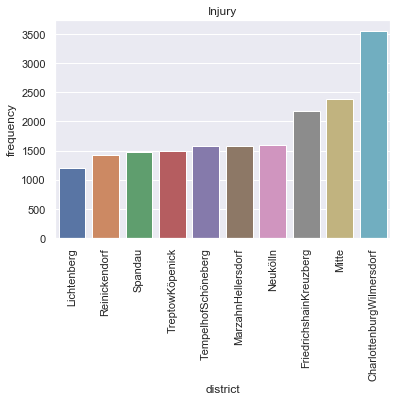

In [31]:
# which neighbourhood have injury in their top 3 crimes:

local_injury = other_topcrimes_neighbourhood.loc[topcrimes_neighbourhood['type'] == 'injury']
local_injury.head()
#visualising districts with injury

local_injury_D = local_injury.groupby('district')['frequency'].mean().reset_index()
local_injury_D = local_injury_D.sort_values('frequency')
sns.barplot(local_injury_D.district, local_injury_D.frequency)
plt.xticks(rotation=90)
plt.title("Injury")


As shown above, injury for example (not to mention the standard theft and local crime categories), is more common in Friedrichschein/Kreuzberg than bike-theft is. Bike-theft is only 'high' in one district in Friedrichshain. Another interesting observation is the 'wide spread' of drugs, meaning that the drugs rate varies over the years and/or districts more than the other crimes (same goes for the local and theft categories). 

,district,neighborhood,type,frequency
249,Neukölln,Schillerpromenade,drugs,1834.12
236,FriedrichshainKreuzberg,nördliche Luisenstadt,drugs,2029.25
102,FriedrichshainKreuzberg,südliche Luisenstadt,drugs,3902.38


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

Text(0.5, 1.0, 'Drugs')

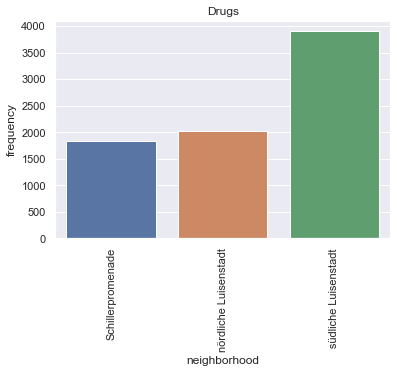

In [291]:
# which neighbourhood have drugs in their top 3 crimes:

local_drugs = other_topcrimes_neighbourhood.loc[other_topcrimes_neighbourhood['type'] == 'drugs']
local_drugs
#visualising districts with drugs
sns.barplot(local_drugs.neighborhood, local_drugs.frequency)
plt.xticks(rotation=90)
plt.title("Drugs")

So, southern Luisenstadt has not only high rates of theft and local crime, but also drugs. 

In [292]:
# Property Damage
local_property_dmg = other_topcrimes_neighbourhood.loc[topcrimes_neighbourhood['type'] == 'property_damage']
local_property_dmg=local_property_dmg.sort_values('frequency', ascending=False)
local_property_dmg.head(3)
len(local_property_dmg)
local_property_dmg.drop(columns= ['type','frequency'],axis=1).groupby('district').count()


,district,neighborhood,type,frequency
59,CharlottenburgWilmersdorf,Forst Grunewald,property_damage,5479.0
121,Mitte,Regierungsviertel,property_damage,3585.0
190,Neukölln,Köllnische Heide,property_damage,2548.0


54

,neighborhood
district,
CharlottenburgWilmersdorf,2
FriedrichshainKreuzberg,4
Lichtenberg,6
MarzahnHellersdorf,3
Mitte,2
Neukölln,4
Pankow,5
Reinickendorf,4
Spandau,4


54 neighbourhoods have property damage in their top 3 crimes. The largest number of neighbourhoods is in Treptow-Koepenick.The highest frequency is seen in Grunewald forest (again, due to the small population size, this is an outlier), Regierungsquarter in Mitte and  Köllnische Heide in Neukölln.

In [293]:
# Theft with a car
local_thft_car = other_topcrimes_neighbourhood.loc[topcrimes_neighbourhood['type'] == 'theft_from_car']
len(local_thft_car)
local_thft_car=local_thft_car.sort_values('frequency', ascending=False)
local_thft_car.head(3)

27

,district,neighborhood,type,frequency
229,Mitte,Tiergarten Süd,theft_from_car,2117.12
248,CharlottenburgWilmersdorf,CharlottenburgNord,theft_from_car,1835.38
287,CharlottenburgWilmersdorf,Grunewald,theft_from_car,1477.25


In [294]:
#threats
local_threats = other_topcrimes_neighbourhood.loc[topcrimes_neighbourhood['type'] == 'threat']
local_threats

,district,neighborhood,type,frequency
41,CharlottenburgWilmersdorf,Forst Grunewald,threat,6092.14


The threat is in the top three crimes only in Grunewald forest, so clearly, an outlier.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

Text(0.5, 1.0, 'Bike_theft')

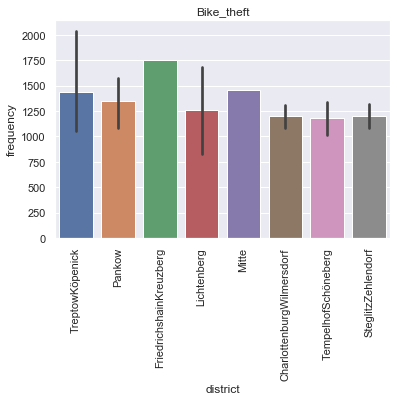

In [295]:
# which neighbourhoods have bike theft in their top 3 crimes:

local_biketheft = other_topcrimes_neighbourhood.loc[topcrimes_neighbourhood['type'] == 'bike_theft']
local_biketheft_D = (local_biketheft.groupby(['district','neighborhood'])['frequency']
                     .mean().reset_index(drop=False).sort_values(['district','frequency']))

#visualising districts with bike thefts
local_biketheft_D= local_biketheft_D.sort_values('frequency', ascending=False)
sns.barplot(local_biketheft_D.district, local_biketheft_D.frequency)
plt.xticks(rotation=90)
plt.title("Bike_theft")

The results shown above are relative to the crimes in each neighbourhood. They do not represent the highest crime levels on city level. Rather, they show (apart from local crime and theft, which are the most common categories overall) the chances of one of these crimes happening in each neighbourhood (relative to other crime types in the neighbourhood). 
For example, drugs related offenses are in the top three categories in Schillerpromenade neighborhood in Neukolln, and north/south Lusienstadt in Friedrichshain, which means that average frequencies of other crimes in these neighbourhoods are lower. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

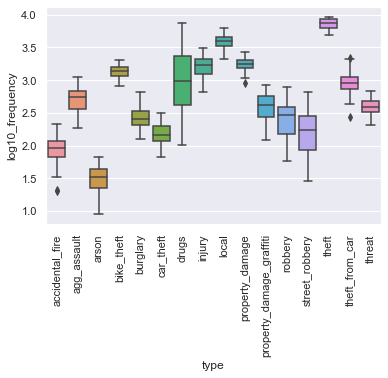

In [296]:
# How does bike theft in Friedrichshein/Kreuzberg relate to other crimes in the district?

FridKreuz = cfreqout_wo_outliers1.loc[cfreqout_wo_outliers1['district']=='FriedrichshainKreuzberg'].sort_values('type')

sns.boxplot(FridKreuz.type, FridKreuz.log10_frequency)

plt.xticks(rotation=90)

## 10. Is Kreuzberg/Friedrichshain different from the distribution of crime in Berlin overall? Is Kreuzberg/Friedrichshain a good representation of the population?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

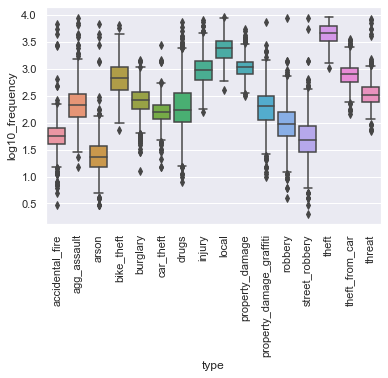

In [38]:
# comparing observed frequencies in Kreuzberg with frequencies in all districts in Berlin
cfreqout_wo_outliers11 = cfreqout_wo_outliers1.sort_values('type')
sns.boxplot(cfreqout_wo_outliers11.type, cfreqout_wo_outliers11.log10_frequency)
plt.xticks(rotation=90)

In [298]:
FridKreuztypes11 = FridKreuz.groupby('type').mean()

In [40]:
t_stat, p_val = stats.ttest_ind(FridKreuz['frequency'], cfreqout_wo_outliers1['frequency'], equal_var=False)
t_stat
p_val

6.180886278037369

9.039837999185696e-10

In [310]:
# Comparison of South Luisenstadt and Regierungsviertel (excluding theft)

#S Luisenstadt
SLuisenStadt = cfreqout_wo_outliers1.loc[cfreqout_wo_outliers1['neighborhood']== 'südliche Luisenstadt']
SLuisenStadtC=SLuisenStadt.groupby('type')['frequency'].mean().reset_index(drop=False)
SLuisenStadtC =SLuisenStadtC.sort_values('frequency')
SLuisenStadtCNOTHEFT= SLuisenStadtC.loc[SLuisenStadtC['type']!='theft']
SLuisenStadtCNOTHEFT

,type,frequency
2,arson,43.000
0,accidental_fire,120.625
5,car_theft,147.875
4,burglary,319.000
15,threat,402.375
12,street_robbery,413.500
11,robbery,557.250
10,property_damage_graffiti,557.750
1,agg_assault,734.750
14,theft_from_car,850.750


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Crime Type')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Crimes in South Luisenstadt')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

[(0, 8000)]

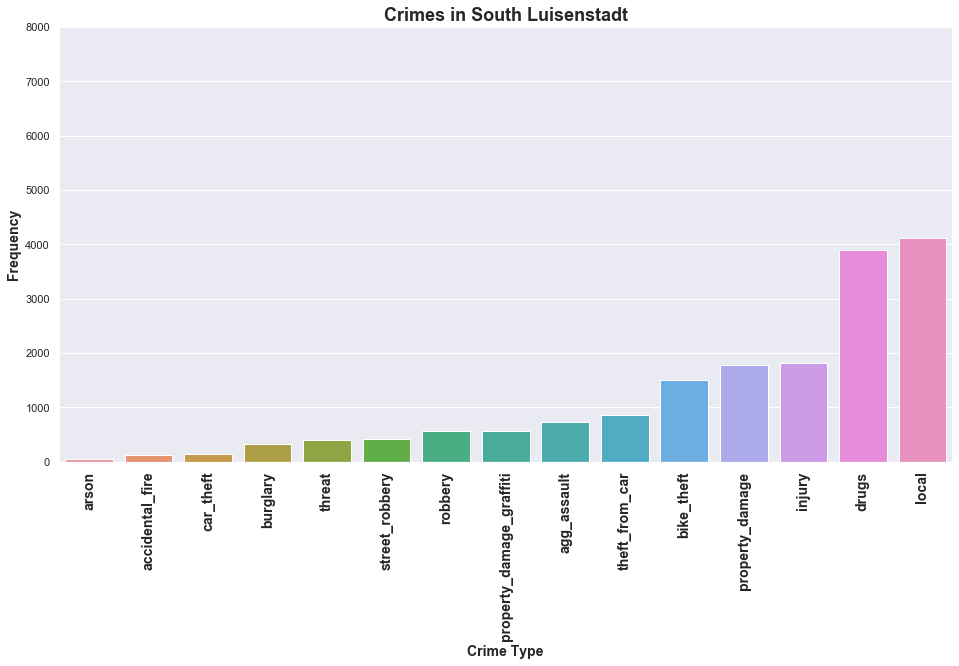

In [311]:
# plotting
plt.figure(figsize=(16,8))
ax= sns.barplot(x= 'type',
            y= 'frequency',
            data =SLuisenStadtCNOTHEFT
            )
ax.set_xlabel('Crime Type',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Frequency',fontsize=14,FontWeight = 'bold');
ax.set_title('Crimes in South Luisenstadt',fontsize=18,FontWeight = 'bold' )
plt.xticks(rotation=90, fontsize = 14, FontWeight='bold')
ax.set(ylim=(0,8000))

In [230]:
# Regierungsviertel

Regierungsviertel = cfreqout_wo_outliers1.loc[cfreqout_wo_outliers1['neighborhood']== 'Regierungsviertel']
RegierungsviertelC=Regierungsviertel.groupby('type')['frequency'].mean().reset_index(drop=False)
RegierungsviertelC = RegierungsviertelC.sort_values('frequency')
RegierungsviertelC

# plotting
plt.figure(figsize=(16,8))
ax= sns.barplot(x= 'type',
            y= 'frequency',
            data =RegierungsviertelC
            )
ax.set_xlabel('Crime Type',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Frequency',fontsize=14,FontWeight = 'bold');
ax.set_title('Crimes in Regierungsviertel',fontsize=18,FontWeight = 'bold' )
plt.xticks(rotation=90, fontsize = 14, FontWeight='bold')

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Crime Type')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Crimes in Regierungsviertel')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

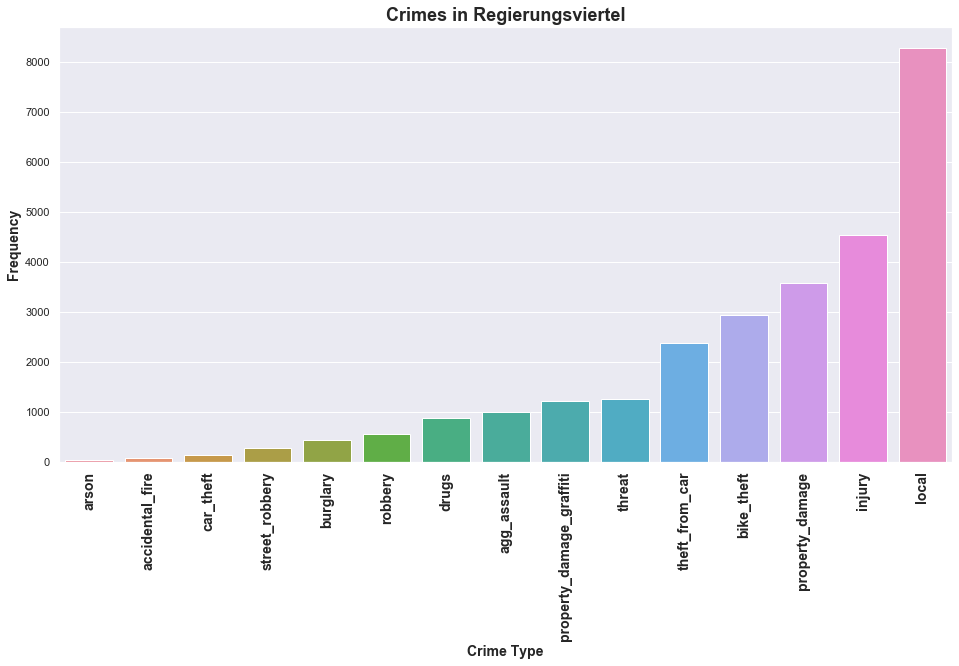

## 11. Checking the Hypothesis about Tourists being a major factor in Crime Rates

,District,Year,Tourists,Overnights,const,Robbery,Street_robbery,Injury,Agg_assault,Threat,...,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes,Population,Area
0,Mitte,2019,6069884,14739386,1.0,707,407,7595,1951,2157,...,845,291,104,6142,1601,4233,15967,85149,385748,39.47
1,Mitte,2018,5732248,13923473,1.0,733,449,7450,1854,2068,...,775,245,75,5528,1510,3792,14899,85472,383457,39.47
2,Mitte,2017,5421582,12865603,1.0,763,465,7856,2002,2221,...,960,287,113,5625,1488,3839,15900,92737,377965,39.47
3,Mitte,2016,5363117,13022961,1.0,976,611,7405,1936,2047,...,1354,309,112,5576,1268,3350,16015,100288,371407,39.47
4,Mitte,2015,5168156,12485970,1.0,1040,589,7107,1923,2078,...,1265,253,110,5256,1210,2638,15078,95109,363236,39.47


<Figure size 720x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'District')

Text(0, 0.5, 'Number of Tourists')

Text(0.5, 1.0, 'Tourists per District')

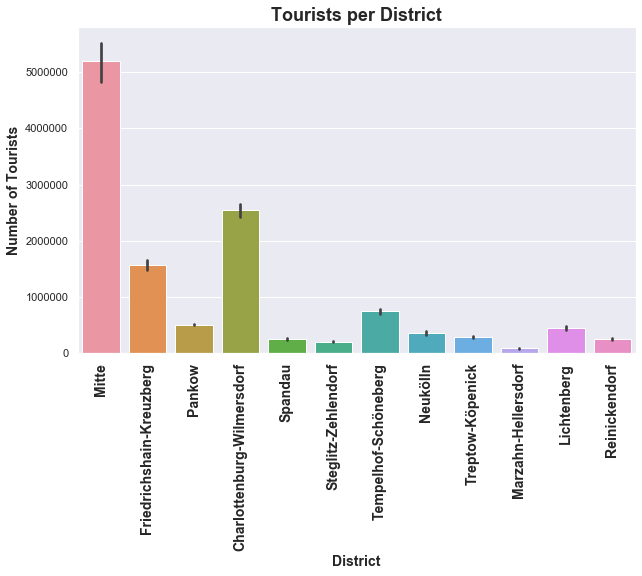

In [320]:
#Modelling with number of tourists

tourists= pd.read_excel('TouristsNumbers.xlsx')
tourists_area_crimes = pd.merge(tourists, popcrimes_area, on = ['District','Year'], how='inner')
tourists_area_crimes.head()

# visualising number of tourists in each District

plt.figure(figsize=(10,6))

ax=sns.barplot(x='District',y='Tourists',data= tourists_area_crimes)

plt.xticks(rotation=90, fontsize = 14, FontWeight='bold')

ax.set_xlabel('District',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Number of Tourists',fontsize=14,FontWeight = 'bold');
ax.set_title('Tourists per District',fontsize=18,FontWeight = 'bold' )


In [321]:
# Checking correlation between number of tourists and crimes

X= tourists_area_crimes['AllCrimes']
Y= tourists_area_crimes['Tourists']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print('The correlation is' + str(r_value))
if p_value <0.05:
    print('The t-test shows this correlation is statistically significant.')

The slope is: 68.4706358508145
The intercept is: -2073812.6101876562
The correlation is0.8857532170182685
The t-test shows this correlation is statistically significant.


<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Count of Crime')

Text(0, 0.5, 'Number of Tourists')

Text(0.5, 1.0, 'Correlation of Crime and Number of Tourists')

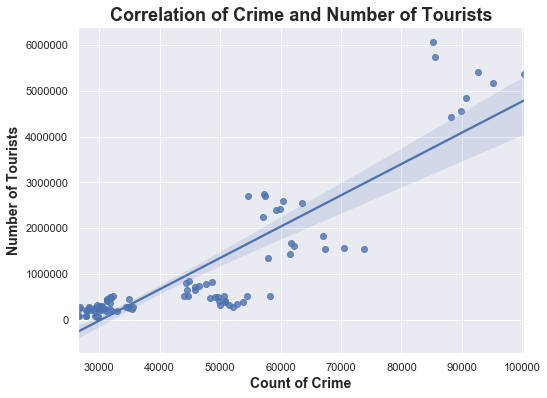

In [323]:
#Plotting
plt.figure(figsize=(8,6))
ax=sns.regplot(x= 'AllCrimes',
            y= 'Tourists',
            data =tourists_area_crimes
            );
ax.set_xlabel('Count of Crime',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Number of Tourists',fontsize=14,FontWeight = 'bold');
ax.set_title('Correlation of Crime and Number of Tourists',fontsize=18,FontWeight = 'bold' )


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Count of Crime')

Text(0, 0.5, 'Number of Tourists')

Text(0.5, 1.0, 'Correlation of Crime and Number of Tourists')

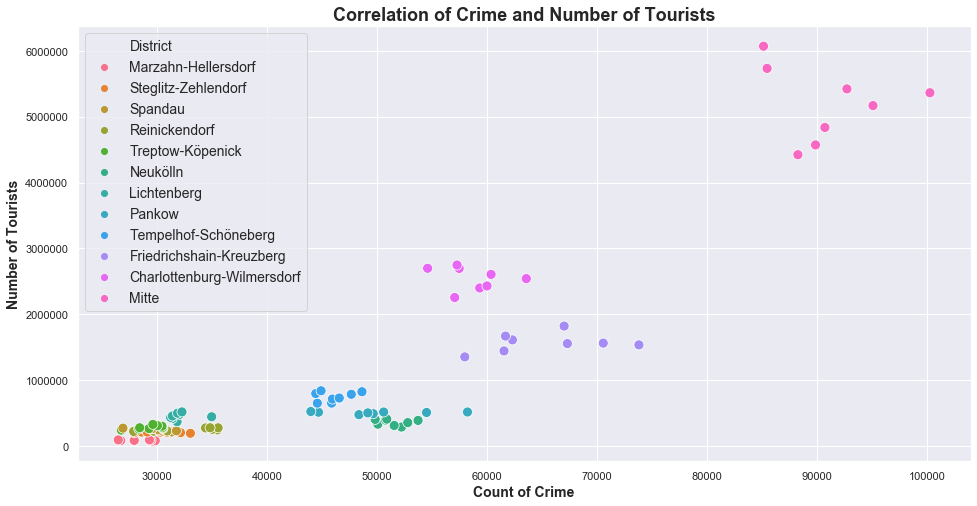

In [324]:
# Showing districts on the scatter plot from above
tourists_area_crimes=tourists_area_crimes.sort_values('Tourists')
plt.figure(figsize=(16,8))
ax=sns.scatterplot(x= 'AllCrimes',
            y= 'Tourists',
            data =tourists_area_crimes,
            hue='District',
            s=100)
plt.legend(fontsize=14, title_fontsize=11)
ax.set_xlabel('Count of Crime',fontsize=14, FontWeight = 'bold');
ax.set_ylabel('Number of Tourists',fontsize=14,FontWeight = 'bold');
ax.set_title('Correlation of Crime and Number of Tourists',fontsize=18,FontWeight = 'bold' )

In [326]:
# Regression for Area, Population and Crime Number

popcrimes_area = sm.add_constant(popcrimes_area)
popcrimes_area.Area = popcrimes_area.Area.astype(float)

lin_regAPC = sm.OLS(popcrimes_area['AllCrimes'],
                   popcrimes_area[['const','Area','Population']])

resultAPC = lin_regAPC.fit()
resultAPC.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AllCrimes   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     63.15
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           4.75e-18
Time:                        18:46:40   Log-Likelihood:                -1038.8
No. Observations:                  96   AIC:                             2084.
Df Residuals:                      93   BIC:                             2091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -357.8005   9239.165     -0.039      0.969   -1.87e+04     1.8e+04
Area        -214.4781     34.171     -6.277      0.000    -282.334    -146.622
Population     0.2039      0.027      7.527      0.000       0.150       0.258
==============================================================================
Omnibus:                        8.550   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.168
Skew:                           0.751   Prob(JB):                       0.0102
Kurtosis:                       2.813   Cond. No.                     2.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [327]:
# Regression: Area,Population, Tourists and Crime
lin_regAPCT = sm.OLS(tourists_area_crimes['AllCrimes'],
                   tourists_area_crimes[['const','Area','Population','Tourists']])

resultAPCT = lin_regAPCT.fit()
resultAPCT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AllCrimes   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     212.9
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.91e-41
Time:                        18:47:03   Log-Likelihood:                -980.49
No. Observations:                  96   AIC:                             1969.
Df Residuals:                      92   BIC:                             1979.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.605e+04   5182.435      3.097      0.003    5757.048    2.63e+04
Area        -110.0498     20.013     -5.499      0.000    -149.798     -70.302
Population     0.0943      0.017      5.681      0.000       0.061       0.127
Tourists       0.0087      0.001     14.759      0.000       0.008       0.010
==============================================================================
Omnibus:                        1.841   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.574
Skew:                           0.314   Prob(JB):                        0.455
Kurtosis:                       3.007   Cond. No.                     1.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Including number of tourists significantly improves the model, and confirms that number of tourists do play a major role in the distribution of crime. 